In [5]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [11]:
transform = transforms.Compose([transforms.ToTensor()])

train_set = torchvision.datasets.MNIST (root = "./dataset", train = True, download = False, transform = transform)
test_set = torchvision.datasets.MNIST (root = "./dataset", train = False, download = False, transform = transform)

train_loader = torch.utils.data.DataLoader (train_set, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader (test_set, batch_size = 32, shuffle = False)

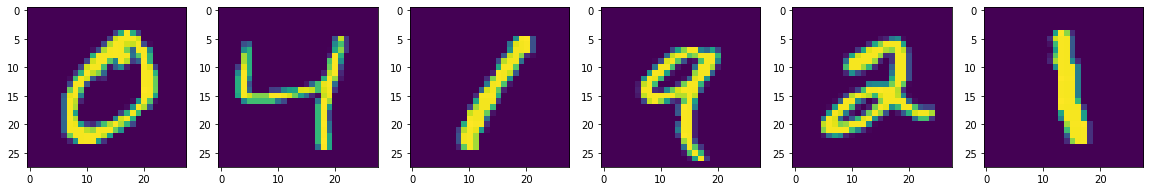

In [19]:
# visualize data
fig = plt.figure (figsize = (20, 20))
for i in range(1, 7):
    img = transforms.ToPILImage(mode='L')(train_set[i][0])
    fig.add_subplot(1, 6, i)
    plt.imshow(img)
plt.show()

In [20]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear_1 = nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = nn.Linear(128, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        
        x = x.reshape(x.size(0), -1)
        
        x = self.linear_1(x)
        x = self.relu(x)
        
        pred = self.linear_2(x)

        return pred

In [21]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)